## Observations and Insights

## Dependencies and starter code

In [116]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_df=pd.merge(mouse_metadata,study_results, how='outer', on='Mouse ID')
Drug_list=combined_df['Drug Regimen'].unique()
Drug_list.sort()
combined_df.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [73]:
data={'Statistics':('Mean','Median','Variance','Standard Variance', 'Standard Error of Mean'),
      'Values':(combined_df["Tumor Volume (mm3)"].mean(),combined_df["Tumor Volume (mm3)"].median(),
      combined_df["Tumor Volume (mm3)"].var(),combined_df["Tumor Volume (mm3)"].std(),
      combined_df["Tumor Volume (mm3)"].sem())}

pd.DataFrame(data)

#DO IT WITH plt.table


# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

,Statistics,Values
0,Mean,50.448381
1,Median,48.951474
2,Variance,79.116074
3,Standard Variance,8.894722
4,Standard Error of Mean,0.204436


## Bar plots

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,161,161,161,161,161,161,161
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


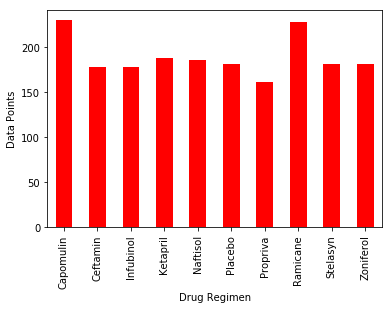

In [118]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
group=combined_df.groupby(['Drug Regimen']).count()

bar=group['Timepoint'].plot(kind='bar',legend =False,color = 'r')
bar.set(xlabel="Drug Regimen", ylabel="Data Points")
group


([<matplotlib.axis.XTick at 0x1a20c051d0>,
 <a list of 10 Text xticklabel objects>)

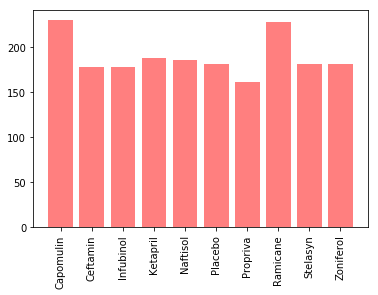

In [98]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
 
Y_axis=[x for x in group['Mouse ID']]

x_axis=np.arange(len(Y_axis))
plt.bar(x_axis, Y_axis, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,Drug_list,rotation='vertical')



## Pie plots

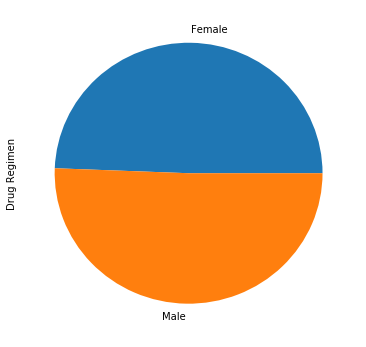

In [155]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
group_m=combined_df.groupby(['Sex']).count()
group_m

group_m.plot(kind='pie', y=['Drug Regimen'],legend=False,figsize=(6, 6))


([<matplotlib.patches.Wedge at 0x1a2229b150>,
 [Text(-0.936203,0.972638,'Male'), Text(0.762832,-0.79252,'Female')])

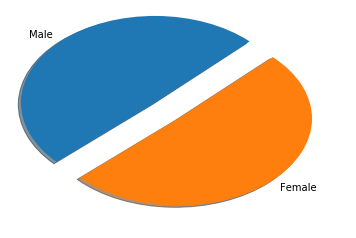

In [167]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(group_m['Drug Regimen'],explode=[0.25,0],labels=['Male','Female'],shadow=True,startangle=45)

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen